In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df_indiv = pd.read_csv("../../scripts/models/models/best_model_test/test_metrics_indiv.csv")
df_indiv = df_indiv.rename(columns={"Unnamed: 0": "label"})

In [3]:
df_agg = pd.read_csv("../../scripts/models/models/best_model_test/test_metrics_agg.csv")

In [12]:
df_indiv = df_indiv.sort_values(by=['roc_auc'], ascending=True).reset_index(drop=True)

In [5]:
df_indiv

,label,roc_auc,avg_prec
0,aldosterone,0.356848,0.000229
1,fat,0.438254,0.000341
2,biologically,0.423715,0.000367
3,cortisol,0.562249,0.000383
4,antitubercular,0.621430,0.000389
...,...,...,...
1536,brightening,0.942933,0.695263
1537,lpx,0.987801,0.697280
1538,ire1,0.999468,0.749107
1539,cot,1.000000,1.000000


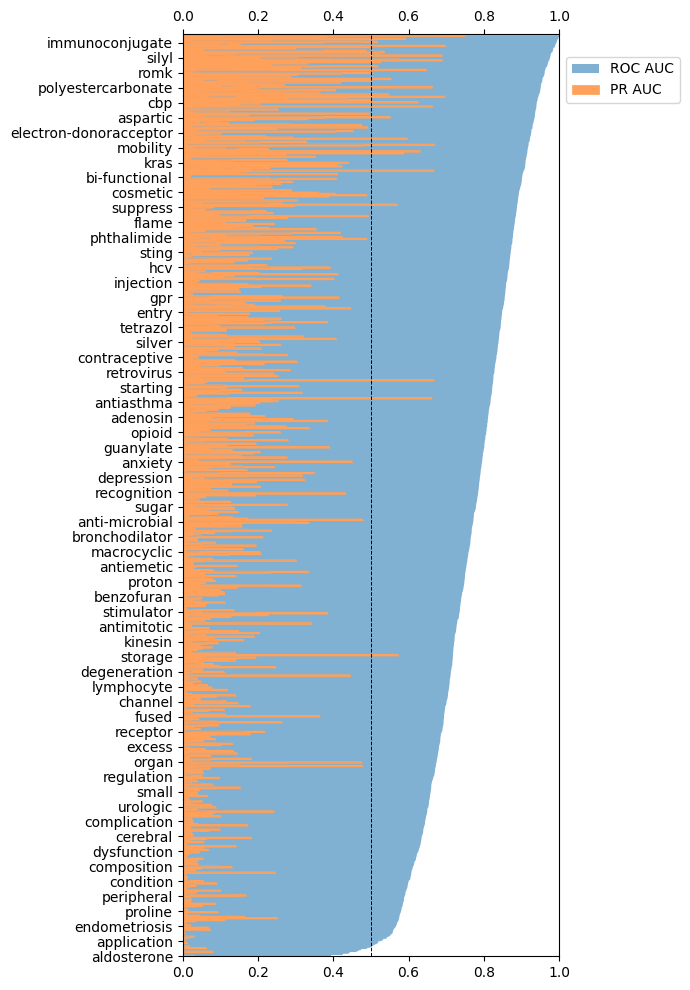

In [29]:
# create bar plot of roc_auc and avg_prec by index

plt.figure(figsize=(7, 10))


plt.fill_betweenx(df_indiv.index,
                  df_indiv['roc_auc'],
                  step="pre",
                  alpha=1,
                  color=(128/256,177/256,211/256),
                  linewidth=0.01,
                )

plt.fill_betweenx(df_indiv.index,
                    df_indiv['avg_prec'],
                    step="pre",
                    alpha=1,
                    color="#FFA15A",
                    linewidth=0.5,
                )


plt.step(x=df_indiv['roc_auc'],
         y=df_indiv.index, 
         color=(128/256,177/256,211/256),
         linewidth=0.01,
         )

# fill under
plt.step(x=df_indiv['avg_prec'],
         y=df_indiv.index, 
         color="#FFA15A",
         # small line width to fill under
          linewidth=0.5,
         )


# make vertical black dash line at x=0.5. Label
plt.axvline(x=0.5, color='black', linestyle='--', linewidth=0.7, label='ROC Baseline')





plt.ylim(0, len(df_indiv.index) - 1)
plt.xlim(0, 1)

# override every 10th y labels with df_indiv['label']
plt.yticks(df_indiv.index[::25], df_indiv['label'][::25], rotation=0)

# x labels on top, vertical lines
plt.tick_params(axis='x', top=True, labeltop=True, bottom=True, labelbottom=True)

# outside legend
plt.legend(['ROC AUC', 'PR AUC'], loc='center left', bbox_to_anchor=(1, 0.95))

plt.tight_layout()
plt.show()


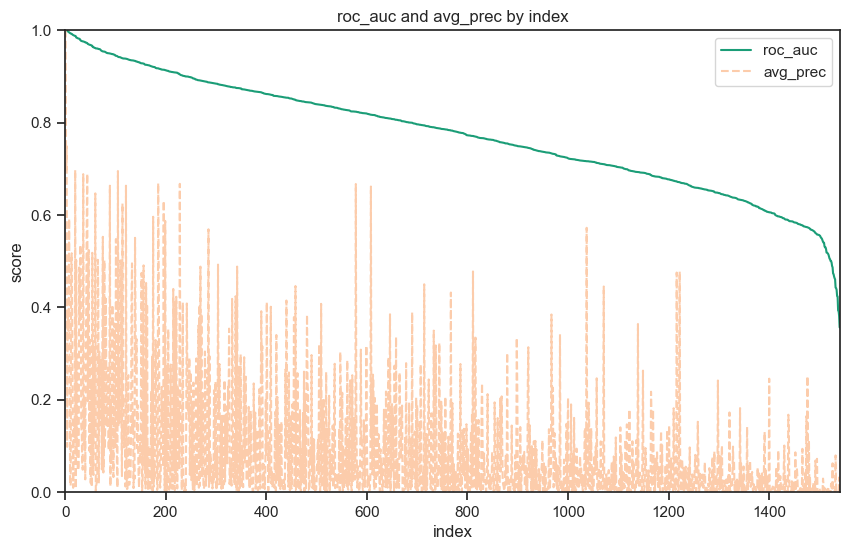

In [71]:
# create plot of roc_auc and avg_prec by index

plt.figure(figsize=(10, 6))
plt.plot(df_indiv.index, 
         df_indiv['roc_auc'], 
         label='roc_auc',
         color=(27/256,158/256,119/256))
plt.plot(df_indiv.index, 
         df_indiv['avg_prec'], 
         label='avg_prec',
         # linestyle='--',
         color=(253/256,205/256,172/256)
         )
plt.xlabel('index')
plt.ylabel('score')
plt.xlim(0, len(df_indiv.index))
plt.ylim(0, 1)
plt.title('roc_auc and avg_prec by index')
plt.legend()
plt.show()